In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### **Read the sales data:**

In [50]:
sale_df = pd.read_csv("sales_data.csv")

In [51]:
sale_df.head()

,TransactionID,CustomerID,ProductID,Quantity,Price,TransactionDate
0,1,101,5001,2,20.0,2024-01-15
1,2,102,5002,1,50.0,2024-01-16
2,3,103,5001,5,20.0,2024-01-17
3,4,101,5003,3,30.0,2024-01-18
4,5,104,5002,1,50.0,2024-01-19


## **Data Aggregation:**

#### **Calculate total sales amount for each product:**

In [52]:
sale_df['TotalSales'] = sale_df['Price']*sale_df['Quantity']

In [53]:
total_sales_each_product = sale_df.groupby('ProductID')['TotalSales'].sum().reset_index()

In [54]:
total_sales_each_product

,ProductID,TotalSales
0,5001,240.0
1,5002,100.0
2,5003,120.0
3,5004,100.0
4,5005,90.0


#### **Calculate the total quantity sold for each product:**

In [55]:
total_quantity_each_product = sale_df.groupby('ProductID')['Quantity'].sum().reset_index()

In [56]:
total_quantity_each_product

,ProductID,Quantity
0,5001,12
1,5002,2
2,5003,4
3,5004,4
4,5005,6


#### **Calculate the average transaction amount per customer:**

In [57]:
average_transaction_per_customer = sale_df.groupby('CustomerID')['TotalSales'].sum().reset_index()

In [58]:
average_transaction_per_customer

,CustomerID,TotalSales
0,101,130.0
1,102,90.0
2,103,130.0
3,104,50.0
4,105,100.0
5,106,90.0
6,107,60.0


## **Generation a Summary Report:**

#### **Total sales amount and quantity sold for each product:**

In [59]:
summ_total_sales_quantity_each_product = sale_df.groupby('ProductID').agg(
    TotalSalesAmount = ('TotalSales','sum'),
TotalQuantitySold = ('Quantity','sum')
).reset_index()

In [60]:
summ_total_sales_quantity_each_product

,ProductID,TotalSalesAmount,TotalQuantitySold
0,5001,240.0,12
1,5002,100.0,2
2,5003,120.0,4
3,5004,100.0,4
4,5005,90.0,6


#### **Average transaction amount per customer:**

In [67]:
summ_avg_trans_per_cust = sale_df.groupby('CustomerID').agg(
    AvgSalesPerCust = ('TotalSales','mean')
).reset_index()

In [68]:
summ_avg_trans_per_cust

,CustomerID,AvgSalesPerCust
0,101,65.0
1,102,45.0
2,103,65.0
3,104,50.0
4,105,100.0
5,106,90.0
6,107,60.0


In [69]:
sale_df.head()

,TransactionID,CustomerID,ProductID,Quantity,Price,TransactionDate,TotalSales
0,1,101,5001,2,20.0,2024-01-15,40.0
1,2,102,5002,1,50.0,2024-01-16,50.0
2,3,103,5001,5,20.0,2024-01-17,100.0
3,4,101,5003,3,30.0,2024-01-18,90.0
4,5,104,5002,1,50.0,2024-01-19,50.0


## **Visualization:**

#### **sales distribution per product:**

Text(0, 0.5, 'Quantity')

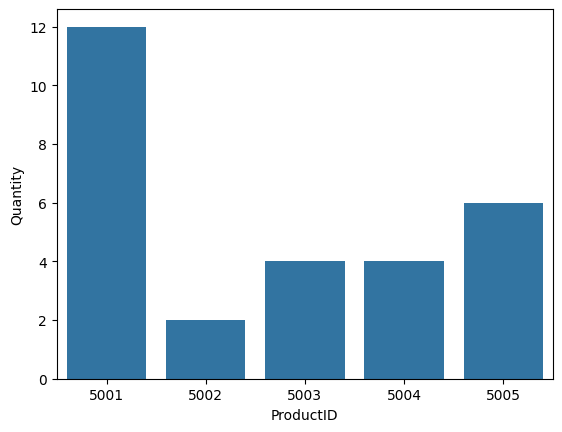

In [74]:
sns.barplot(x = 'ProductID' , y = 'Quantity', data = total_quantity_each_product)
plt.xlabel('ProductID')
plt.ylabel('Quantity')

#### **average transaction amount per customer:**

Text(0, 0.5, 'AvgSalesPerCust')

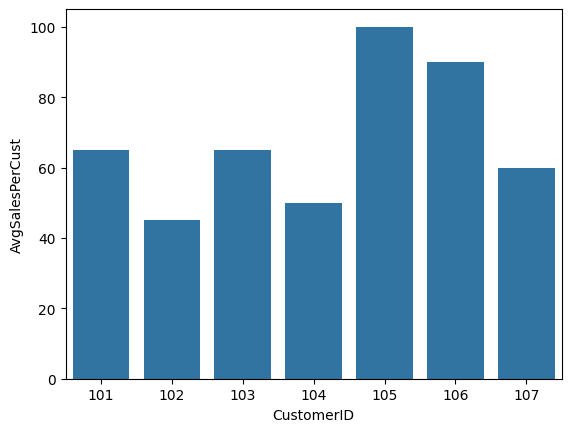

In [72]:
sns.barplot(x = 'CustomerID', y = 'AvgSalesPerCust', data = summ_avg_trans_per_cust)
plt.xlabel("CustomerID")
plt.ylabel("AvgSalesPerCust")

## **Save the summary report in product_summary_report.csv and customer_summary_report.csv:**

In [75]:
summ_total_sales_quantity_each_product.to_csv("product_summary_report.csv")
summ_avg_trans_per_cust.to_csv("customer_summary_report.csv")